<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Limpeza-de-dados" data-toc-modified-id="Limpeza-de-dados-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Limpeza de dados</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Modelo-I" data-toc-modified-id="Modelo-I-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modelo I</a></span></li><li><span><a href="#Modelo-II" data-toc-modified-id="Modelo-II-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modelo II</a></span></li><li><span><a href="#Modelo-III" data-toc-modified-id="Modelo-III-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modelo III</a></span></li><li><span><a href="#EDA-II" data-toc-modified-id="EDA-II-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>EDA II</a></span></li><li><span><a href="#Modelo-IV" data-toc-modified-id="Modelo-IV-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Modelo IV</a></span></li><li><span><a href="#Modelo-V---Partiu-ignorância..." data-toc-modified-id="Modelo-V---Partiu-ignorância...-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Modelo V - Partiu ignorância...</a></span></li></ul></div>

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy, re
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


# Projeto Diamonds

https://selectingadiamond.com/diamond-pricing-a-no-nonsense-guide-to-the-4-cs/

# Limpeza e transformação de dados

Limpeza de 0s nas dimensões

In [16]:
diamonds = pd.read_csv("tb_diamantes.csv")
print("Linhas na etapa atual:", str(len(diamonds)))
x_0 = diamonds["x"] == 0
y_0 = diamonds["y"] == 0
z_0 = diamonds["z"] == 0
dim_0 = x_0 | y_0 | z_0
tb_d_clean = diamonds[~dim_0].copy()
print("Linhas apõs exclusões de 0s em X, Y ou Z:", str(len(tb_d_clean)))


Linhas na etapa atual: 48940
Linhas apõs exclusões de 0s em X, Y ou Z: 48922


In [17]:
dict_clarity = {
    "I1": 0,
    "SI2": 1,
    "SI1": 2,
    "VS2": 3,
    "VS1": 4,
    "VVS2": 5,
    "VVS1": 6,
    "IF": 7,
}
tb_d_clean["num_clarity"] = tb_d_clean["clarity"].map(dict_clarity)
tb_d_clean["grp_clarity"] = tb_d_clean["clarity"].map(lambda x: re.sub(r"[0-9]", "", x))
tb_d_clean.head()


,carat,cut,color,clarity,depth,table,price,x,y,z,num_clarity,grp_clarity
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,SI
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,VS
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,VS
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,SI
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,5,VVS


In [18]:
dict_color = {
    "D": 0,
    "E": 1,
    "F": 2,
    "G": 3,
    "H": 4,
    "I": 5,
    "J": 6,
}
tb_d_clean["num_color"] = tb_d_clean["color"].map(dict_color)

dict_color_group = {
    "D": "Colorless",
    "E": "Colorless",
    "F": "Colorless",
    "G": "Near Colorless",
    "H": "Near Colorless",
    "I": "Tinted",
    "J": "Tinted",
}
tb_d_clean["grp_color"] = tb_d_clean["color"].map(dict_color_group)
tb_d_clean.head()


,carat,cut,color,clarity,depth,table,price,x,y,z,num_clarity,grp_clarity,num_color,grp_color
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,SI,1,Colorless
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,VS,1,Colorless
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,VS,5,Tinted
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,SI,6,Tinted
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,5,VVS,6,Tinted


In [19]:
dict_cut = {
    "Fair": 0,
    "Good": 1,
    "Very Good": 2,
    "Premium": 3,
    "Ideal": 4,
}
tb_d_clean["num_cut"] = tb_d_clean["cut"].map(dict_cut)
tb_d_clean["grp_cut"] = np.where(tb_d_clean["num_cut"] >= 2, "Ideal", "Fair")
tb_d_clean.head()


,carat,cut,color,clarity,depth,table,price,x,y,z,num_clarity,grp_clarity,num_color,grp_color,num_cut,grp_cut
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,SI,1,Colorless,3,Ideal
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,VS,1,Colorless,1,Fair
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,VS,5,Tinted,3,Ideal
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,SI,6,Tinted,1,Fair
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,5,VVS,6,Tinted,2,Ideal


Por fim, o artigo menciona que existe um salto de preço quando trocamos o valor inteiro de peso do diamante (de 0.95 carats para 1 carat por exemplo). Vamos criar uma variável categórica representando estes saltos:

In [20]:
tb_d_clean["grp_carat"] = tb_d_clean["carat"].map(lambda x: str(int(np.floor(x))))
tb_d_clean.head()


,carat,cut,color,clarity,depth,table,price,x,y,z,num_clarity,grp_clarity,num_color,grp_color,num_cut,grp_cut,grp_carat
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,SI,1,Colorless,3,Ideal,0
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,VS,1,Colorless,1,Fair,0
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,VS,5,Tinted,3,Ideal,0
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,SI,6,Tinted,1,Fair,0
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,5,VVS,6,Tinted,2,Ideal,0


Independente da variação de peso e cor/corte, diamantes de uma densidade dada. Vamos utilizar isto para eliminar outliers do nosso dataset:

In [21]:
tb_d_clean["volume"] = tb_d_clean["x"] * tb_d_clean["y"] * tb_d_clean["z"]
tb_d_clean["density"] = tb_d_clean["carat"] / tb_d_clean["volume"]
tb_d_clean.head()


,carat,cut,color,clarity,depth,table,price,x,y,z,num_clarity,grp_clarity,num_color,grp_color,num_cut,grp_cut,grp_carat,volume,density
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,SI,1,Colorless,3,Ideal,0,34.505856,0.006086
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,VS,1,Colorless,1,Fair,0,38.076885,0.006040
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,VS,5,Tinted,3,Ideal,0,46.724580,0.006207
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,SI,6,Tinted,1,Fair,0,51.917250,0.005971
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,5,VVS,6,Tinted,2,Ideal,0,38.693952,0.006203


<AxesSubplot:ylabel='density'>

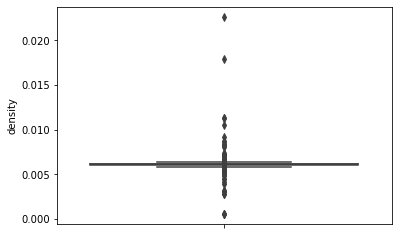

In [22]:
sns.boxplot(data = tb_d_clean, y = 'density')

In [23]:
np.quantile(tb_d_clean['density'], [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])

array([0.00588578, 0.0059541 , 0.00604822, 0.00611678, 0.00618999,
       0.00633392, 0.00648843])

In [24]:
density_inf = np.quantile(tb_d_clean["density"], 0.01)
density_sup = np.quantile(tb_d_clean["density"], 0.99)

In [26]:
density_sup

0.006488432310468318

In [27]:
density_in = (density_inf < tb_d_clean["density"]) & (tb_d_clean["density"] < density_sup)
tb_d_clean = tb_d_clean[density_in].copy()
print("Linhas na etapa atual:", str(len(tb_d_clean)))


Linhas na etapa atual: 47942


In [28]:
tb_d_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 47942 entries, 0 to 48939
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        47942 non-null  float64
 1   cut          47942 non-null  object 
 2   color        47942 non-null  object 
 3   clarity      47942 non-null  object 
 4   depth        47942 non-null  float64
 5   table        47942 non-null  float64
 6   price        47942 non-null  int64  
 7   x            47942 non-null  float64
 8   y            47942 non-null  float64
 9   z            47942 non-null  float64
 10  num_clarity  47942 non-null  int64  
 11  grp_clarity  47942 non-null  object 
 12  num_color    47942 non-null  int64  
 13  grp_color    47942 non-null  object 
 14  num_cut      47942 non-null  int64  
 15  grp_cut      47942 non-null  object 
 16  grp_carat    47942 non-null  object 
 17  volume       47942 non-null  float64
 18  density      47942 non-null  float64
dtypes: f

# EDA

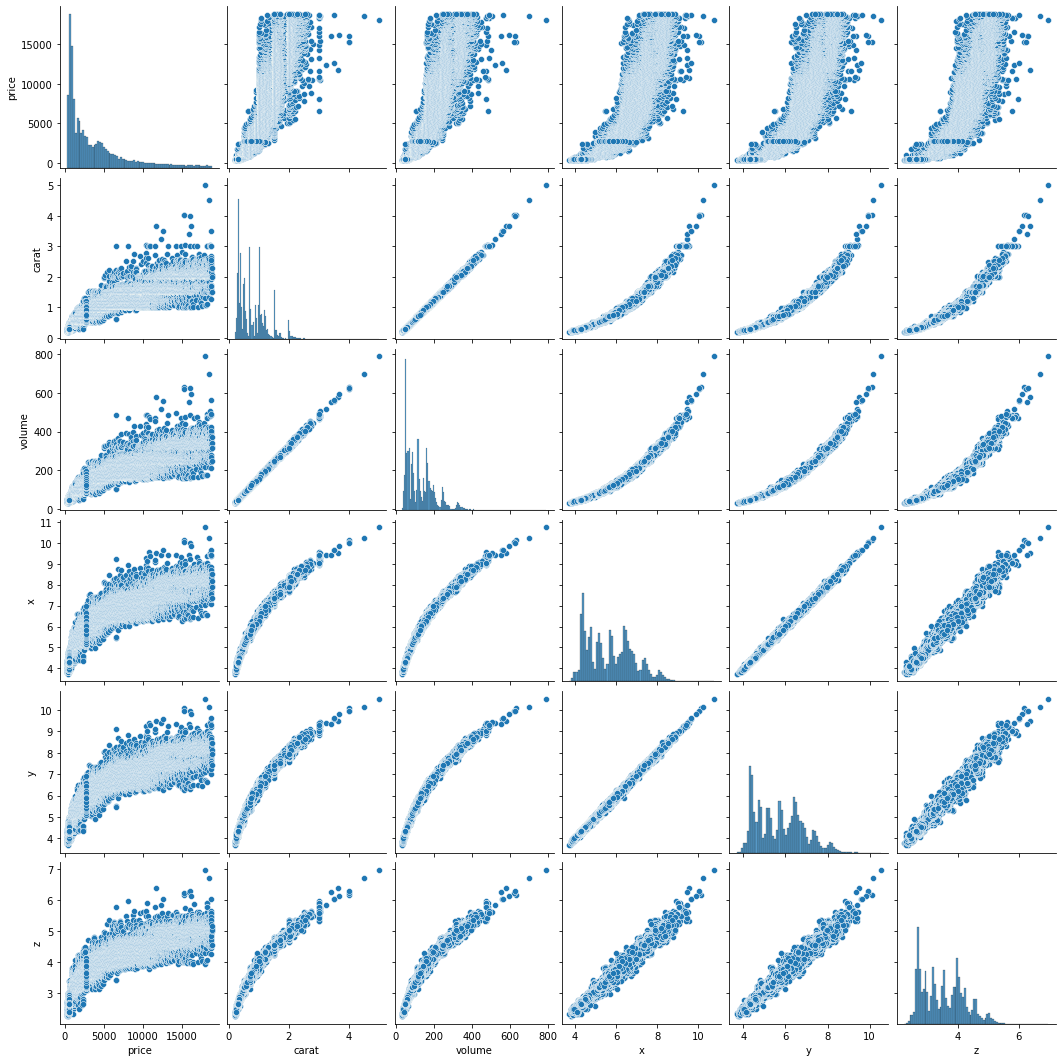

In [29]:
sns.pairplot(tb_d_clean[["price", "carat", "volume", "x", "y", "z"]])


No gráfico acima podemos ver 2 coisas:

1. As variáveis `volume`, `x`, `y`, `z` e `carat` são altamente redundantes.
1. A relação entre `price` e `carat` parece não ser linear...

Vamos utilizar o logaritmo para *linearizar* essa relação:

In [30]:
tb_d_clean["log_price"] = np.log(tb_d_clean["price"])
tb_d_clean["log_carat"] = np.log(tb_d_clean["carat"])


<AxesSubplot:xlabel='log_carat', ylabel='log_price'>

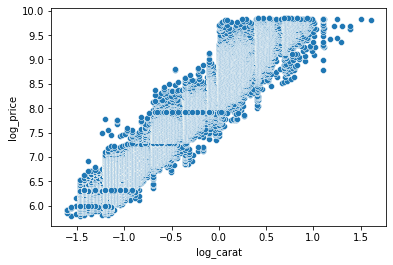

In [31]:
sns.scatterplot(data=tb_d_clean, x="log_carat", y="log_price")


<AxesSubplot:xlabel='grp_carat', ylabel='log_price'>

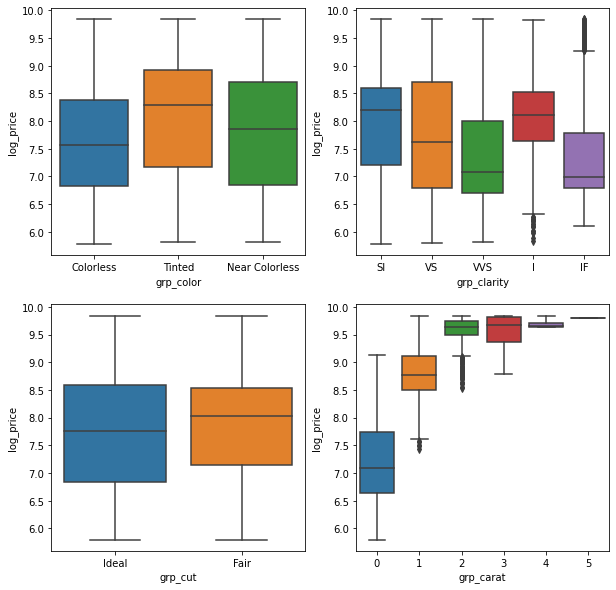

In [35]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.boxplot(data=tb_d_clean, y="log_price", x="grp_color", ax=ax[0][0])
sns.boxplot(data=tb_d_clean, y="log_price", x="grp_clarity", ax=ax[0][1])
sns.boxplot(data=tb_d_clean, y="log_price", x="grp_cut", ax=ax[1][0])
sns.boxplot(data=tb_d_clean, y="log_price", x="grp_carat", ax=ax[1][1])


A relação entre carat e preço é tão forte que fica dificil enxergar qualquer impacto das categorias de cor, claridade e corte sobre o preço! Vamos utilizar uma regressão linear para *isolar* o efeito de carat e analisar o preço sem essa variação:

In [36]:
X = tb_d_clean[["log_carat"]]
y = tb_d_clean["log_price"]
lm_fit = LinearRegression()
lm_fit.fit(X, y)

tb_d_clean["log_price_nok"] = tb_d_clean["log_price"] - lm_fit.predict(X)
tb_d_clean.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,...,num_color,grp_color,num_cut,grp_cut,grp_carat,volume,density,log_price,log_carat,log_price_nok
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,...,1,Colorless,3,Ideal,0,34.505856,0.006086,5.786897,-1.560648,-0.042960
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,...,1,Colorless,1,Fair,0,38.076885,0.006040,5.789960,-1.469676,-0.192814
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,...,5,Tinted,3,Ideal,0,46.724580,0.006207,5.811141,-1.237874,-0.561273
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,...,6,Tinted,1,Fair,0,51.917250,0.005971,5.814131,-1.171183,-0.670386
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,...,6,Tinted,2,Ideal,0,38.693952,0.006203,5.817111,-1.427116,-0.237202


As previsões da regressão linear contém o **efeito modelado da variável `log_carat` sobre `log_price`**. Podemos então utilizar a diferença entre o preço real e este preço projetado como a **diferença no preço de um diamante frente ao preço médio de outros diamantes do mesmo tamanho**!

<AxesSubplot:xlabel='grp_carat', ylabel='log_price_nok'>

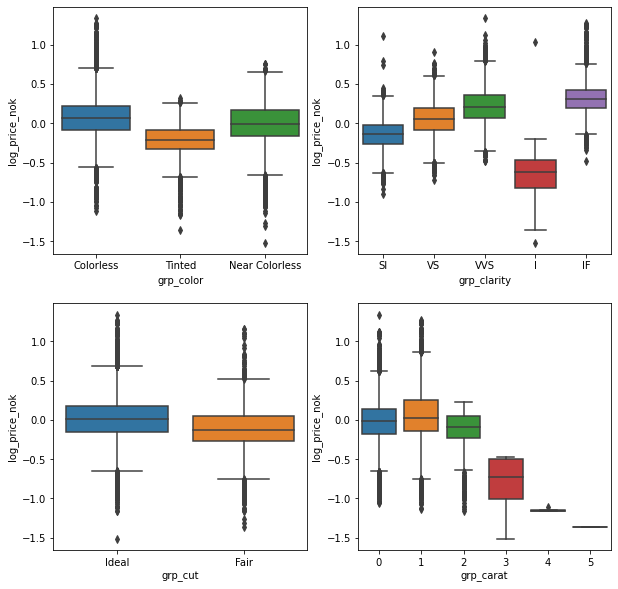

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.boxplot(data=tb_d_clean, y="log_price_nok", x="grp_color", ax=ax[0][0])
sns.boxplot(data=tb_d_clean, y="log_price_nok", x="grp_clarity", ax=ax[0][1])
sns.boxplot(data=tb_d_clean, y="log_price_nok", x="grp_cut", ax=ax[1][0])
sns.boxplot(data=tb_d_clean, y="log_price_nok", x="grp_carat", ax=ax[1][1])


Podemos tirar algumas conclusões dos gráficos acima:

1. O grupo de claridade **I** tem um efeito radicalmente diferente dos outros grupos de claridade. Isto faz sentido: o grupo I representa falhas em claridade observáveis a olho nu.
1. Nossa regressão está super-estimando os preços de diamantas de alto peso (carats acima de 3).

Vamos explorar essas relações através das representações numéricas dessas qualidades:

<AxesSubplot:xlabel='log_price_nok', ylabel='Density'>

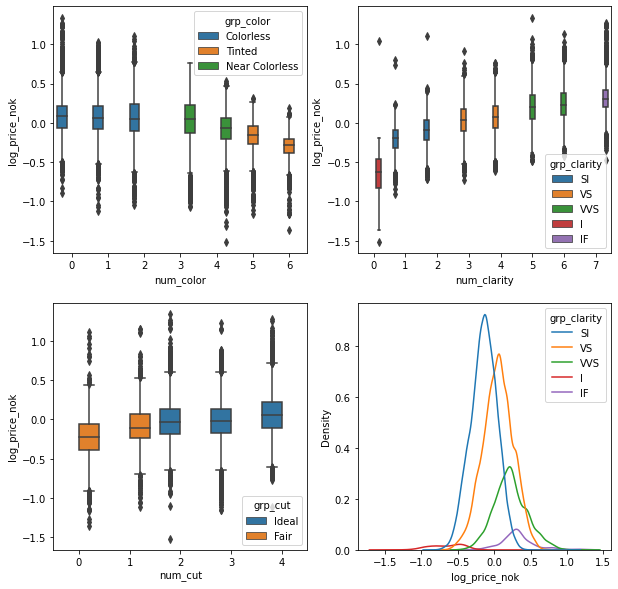

In [38]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.boxplot(
    data=tb_d_clean, y="log_price_nok", x="num_color", hue="grp_color", ax=ax[0][0]
)
sns.boxplot(
    data=tb_d_clean, y="log_price_nok", x="num_clarity", hue="grp_clarity", ax=ax[0][1]
)
sns.boxplot(data=tb_d_clean, y="log_price_nok", x="num_cut", hue="grp_cut", ax=ax[1][0])
sns.kdeplot(data=tb_d_clean, x="log_price_nok", hue="grp_clarity", ax=ax[1][1])


O gráfico acima ilustra alguns pontos importantes sobre as variáveis originais de nosso dataset:

1. Nosso grupamento de `color` pode ser melhorado: os grupos de 0-2 estão ok (são semelhantes entre si), mas os 4 e 5 parecem mais semelhantes entre si do que ao seu grupo de origem.
1. O **agrupamento de claridade** (representado em um boxplot e no gráfico de densidade) *representa uma boa parte da variação observada no preço* (isolando o efeito de carat, é claro), mas a representação numérica dos grupos (em sua menor granularidade) parece não adicionar muita diferenciação: dentro de cada **`grp_clarity` parece existir pouca diferença entre os níveis**. Além disso o impacto dos grupos parece bem **desigual**: o grupo I é mais distante do grupo SI que este é do grupo VS. Isto nos indica que utilizar uma representação numérica (onde o aumento de uma unidade será uniforme) não é adequado;
1. Por último, o grupo de corte (`grp_cut`) e sua representaçào granular parecem ser os valores que menos impactam o preço. 

Vamos aprofundar nossa análise em 2 eixos:

1. Melhorar a variável `grp_cut`;
1. Corrigir o preço de diamantes com `grp_carat >= 3`.

Além disso vamos corrigir a variável `grp_color` para refletir o impacto mensurado acima.

## Melhorando `grp_cut`

Vamos utilizar uma regressão linear para entender como os diferentes níveis de `num_cut` se relacionam.

In [39]:
X = sm.add_constant(pd.get_dummies(tb_d_clean["num_cut"], drop_first=True))
y = tb_d_clean["log_price_nok"]
lm_fit_cut = sm.OLS(y, X).fit()
print(lm_fit_cut.summary())


                            OLS Regression Results                            
Dep. Variable:          log_price_nok   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     686.4
Date:                Tue, 27 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:09:53   Log-Likelihood:                -2153.6
No. Observations:               47942   AIC:                             4317.
Df Residuals:                   47937   BIC:                             4361.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2400      0.007    -32.615      0.0

Vamos utilizar o resultado desse modelo para avaliar o impacto da variação do grupo de corte. Esta regressão possui apenas *variáveis dummy*: **o intercepto representa o valor de `num_cut = 0` e cada coeficiente a diferença dos outros valores de `num_cut` para `num_cut = 0`.

Todos os níveis possuem relevância estatística (valor-p menor que 0.05), no entanto os coeficientes associados aos grupos `num_cut = 2` e `num_cut = 3` são praticamente idênticos! Isso sugere uma nova categorização dessa variável:

1. Quando `num_cut = 0`, temos um grupo bem definido (com -0.24 de média);
1. Quando `num_cut = 1`, temos um segundo grupo bem definido (com -0.24 + 0.15 = -0.09 de média);
1. Quando `num_cut = 2` ou `num_cut = 3` temos um terceiro grupo bem definido (com -0.24 + 0.22 = -0.02 de média);
1. Quando `num_cut = 4` temos um quarto grupo bem definido (com -0.24 + 0.3 = 0.06 de média).

## Corrigindo o preço para `grp_carat >= 3`

O boxplot de `log_price_nok` por `grp_carat` nos mostrou que o impacto da variável `log_carat` sobre `log_price` não é igual entre diamantes com menos de 3 carats e diamantes com mais de 3 carats.

Vamos investigar nossa regressão original para investigar o que está acontecendo.

<AxesSubplot:xlabel='grp_carat', ylabel='price'>

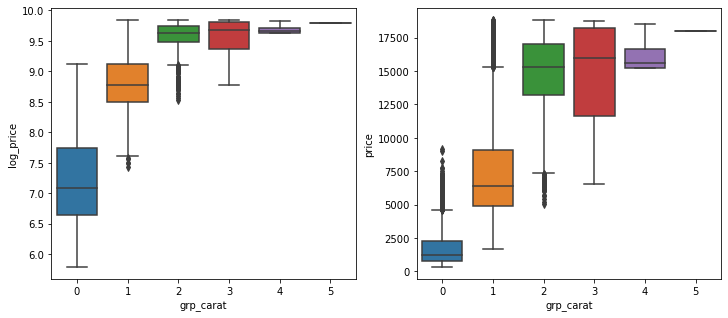

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(data=tb_d_clean, x="grp_carat", y="log_price", ax=ax[0])
sns.boxplot(data=tb_d_clean, x="grp_carat", y="price", ax=ax[1])


No gráfico acima podemos ver o impacto da variável `carat` (representada por `grp_carat`) sobre as variáveis `price` e `log_price`. Embora o logaritmo funcione bem para linearizar a relação entre preço e carat para diamantes com `0 <= carat <= 3`, a relação para diamantes `carat >= 3` não é tão clara.

A dispersão dos diamantes com `grp_carat = 3` pode indicar que temos **poucos diamantes** tão grandes - o que pode impactar negativamente a nossa estimativa do coeficiente para todos os diamantes! Vamos avaliar a distribuição desta variável:

<AxesSubplot:xlabel='carat', ylabel='Density'>

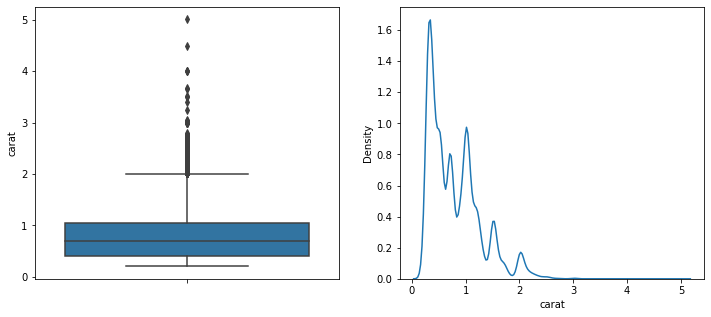

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(data=tb_d_clean, y="carat", ax=ax[0])
sns.kdeplot(data=tb_d_clean, x="carat", ax=ax[1])


No gráfico acima podemos ver dois efeitos distintos:

1. Temos pouqíssimos diamantes com mais de 2 carats;
1. Os diamantes tendem a se concentrar em torno dos valores inteiros de carat (o que faz sentido frente ao que lemos sobre a variação não-linear de valor de diamantes entre 0.95 carats e 1 carat).

Vamos utilizar um `lmplot` para visualizar a relação entre `log_price` e `log_carat` condicionada ao `grp_carat`:

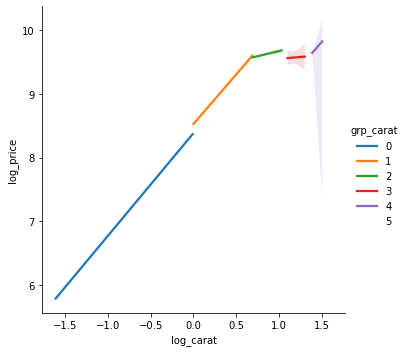

In [42]:
sns.lmplot(
    data=tb_d_clean, x="log_carat", y="log_price", hue="grp_carat", scatter=False
)


Neste gráfico podemos ver que a relação entre `log_carat` e `log_price` é bem linear para diamantes entre 0 e 2 carats, mas que o *slope* da relação muda radicalmente para diamantes com mais que 2 carats. Isso faz sentido com nossas visualizações anteriores: parece haver um *teto* de preço para os diamantes!

Vamos utilizar uma interação entre `log_carat` e `grp_carat` para estimar coeficientes distintos para estes dois grupos (semelhante ao que fizemos com a interação entre BMI e *smoker* na aula de regressão múltipla):

In [ ]:
tb_d_clean["log_carat_menor_2"] = np.where(
    tb_d_clean["carat"] < 2, tb_d_clean["log_carat"], 0
)
tb_d_clean["log_carat_maior_2"] = np.where(
    tb_d_clean["carat"] >= 2, tb_d_clean["log_carat"], 0
)


Devemos tomar um certo cuidado ao inserir interações desta forma: se pensarmos na construção das variáveis `log_carat`, `log_carat_menor_2` e `log_carat_maior_2` veremos que elas são colineares - `log_carat = log_carat_menor_2 + log_carat_maior_2`! Logo, devemos utilizar apenas 2 das três variáveis: por exemplo, podemos utilizar `log_carat` (efeito geral do peso) e `log_carat_maior_2` (o quão diferente os diamantes maiores se comportam).

Além disso vamos criar uma variável para indicar o quão distante um diamante está do próximo *patamar* de carat:

In [43]:
tb_d_clean["dist_carat"] = tb_d_clean["carat"] - (np.floor(tb_d_clean["carat"]) + 1)


<AxesSubplot:xlabel='dist_carat', ylabel='log_price_nok'>

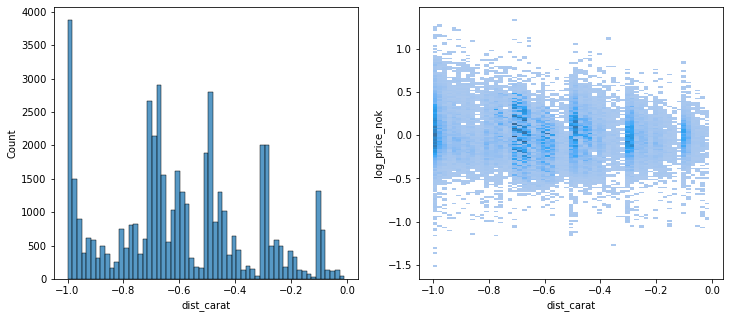

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=tb_d_clean, x="dist_carat", ax=ax[0])
sns.histplot(data=tb_d_clean, x="dist_carat", y="log_price_nok", ax=ax[1])


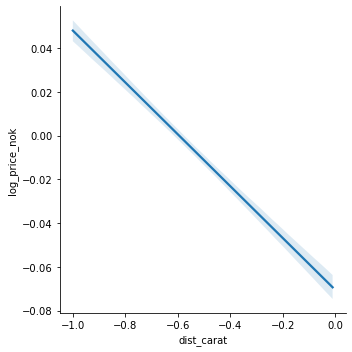

In [46]:
sns.lmplot(data=tb_d_clean, x="dist_carat", y="log_price_nok", scatter=False)


Podemos ver um efeito distinto de agrupamento em torno de certas distâncias - indicando que o corte de diamantes deve levar em consideração o quão próximo um diamante pode estar de um valor inteiro de carat.

Talvez os joalheiros *sacrifiquem* peso do diamante durante o corte para melhorar *claridade*! Este efeito parece bem complexo - por hora utilizar apenas o efeito de forma linear, como visto no `lmplot` acima.

# Consolidando Transformações

In [47]:
diamonds = pd.read_csv("tb_diamantes.csv")
print("Linhas na lidas:", str(len(diamonds)))
x_0 = diamonds["x"] == 0
y_0 = diamonds["y"] == 0
z_0 = diamonds["z"] == 0
dim_0 = x_0 | y_0 | z_0
tb_d_clean = diamonds[~dim_0].copy()

tb_d_clean["volume"] = tb_d_clean["x"] * tb_d_clean["y"] * tb_d_clean["z"]
tb_d_clean["density"] = tb_d_clean["carat"] / tb_d_clean["volume"]
density_inf = np.quantile(tb_d_clean["density"], 0.01)
density_sup = np.quantile(tb_d_clean["density"], 0.99)
density_in = (density_inf < tb_d_clean["density"]) & (
    tb_d_clean["density"] < density_sup
)
tb_d_clean = tb_d_clean[density_in].copy()
print("Linhas ao final do processo de limpeza:", str(len(tb_d_clean)))


Linhas na lidas: 48940
Linhas ao final do processo de limpeza: 47942


In [48]:
diamonds_test = pd.read_csv("tb_diamantes_teste.csv")


In [49]:
def transform_X_data(diamond_data):
    diamond_data["grp_clarity"] = diamond_data["clarity"].map(
        lambda x: re.sub(r"[0-9]", "", x)
    )
    dict_color_group = {
        "D": "Colorless",
        "E": "Colorless",
        "F": "Colorless",
        "G": "Colorless",
        "H": "Near Colorless",
        "I": "Near Colorless",
        "J": "Tinted",
    }
    diamond_data["grp_color"] = diamond_data["color"].map(dict_color_group)
    dict_cut = {
        "Fair": "Fair",
        "Good": "Good",
        "Very Good": "Very Good/Premium",
        "Premium": "Very Good/Premium",
        "Ideal": "Ideal",
    }
    diamond_data["grp_cut"] = diamond_data["cut"].map(dict_cut)
    diamond_data["log_carat"] = np.log(diamond_data["carat"])
    diamond_data["log_carat_menor_2"] = np.where(
        diamond_data["carat"] < 2, diamond_data["log_carat"], 0
    )
    diamond_data["log_carat_maior_2"] = np.where(
        diamond_data["carat"] >= 2, diamond_data["log_carat"], 0
    )
    diamond_data["dist_carat"] = diamond_data["carat"] - (
        np.floor(diamond_data["carat"]) + 1
    )
    clarity_dummies = pd.get_dummies(diamond_data["grp_clarity"], prefix="grp_cla")
    color_dummies = pd.get_dummies(diamond_data["grp_color"], prefix="grp_col")
    cut_dummies = pd.get_dummies(diamond_data["grp_cut"], prefix="grp_cut")
    return pd.concat(
        [diamond_data, clarity_dummies, color_dummies, cut_dummies], axis=1
    )


# Construindo nosso primeiro modelo

In [50]:
tb_diamond_train = transform_X_data(tb_d_clean)
tb_diamond_train["log_price"] = np.log(tb_diamond_train["price"])
tb_diamond_test = transform_X_data(diamonds_test)


In [51]:
x_var = [
    "log_carat",
    "log_carat_maior_2",
    "dist_carat",
    "grp_cla_I",
    "grp_cla_IF",
    "grp_cla_SI",
    "grp_cla_VS",
    "grp_col_Colorless",
    "grp_col_Tinted",
    "grp_cut_Fair",
    "grp_cut_Good",
    "grp_cut_Ideal"
]

X_train = tb_diamond_train[x_var]

X_test = tb_diamond_test[x_var]

y_train = tb_diamond_train["price"]


In [52]:
log_price_fit = LinearRegression()
log_price_fit.fit(X_train, np.log(y_train))


LinearRegression()

In [53]:
from sklearn.metrics import mean_squared_error


In [54]:
train_predict = np.exp(log_price_fit.predict(X_train))
np.sqrt(mean_squared_error(y_train, train_predict))


864.6236100869965

In [55]:
tb_diamond_test["price_predicted"] = np.exp(log_price_fit.predict(X_test))


In [56]:
tb_diamond_test.to_csv("price_predicted.csv")


O erro do nosso conjunto de teste está dentro da meta proposta - $874! Agora, vamos buscar formas de melhorar nosso modelo.

## EDA II

A mesma técnica que utilizamos para isolar o efeito de carats sobre preço pode ser utilizada agora - isolando os efeitos que nosso modelo está considerando e buscando variáveis que estejam impactando o erro de nosso modelo.

In [57]:
tb_diamond_train["log_price_mod1"] = log_price_fit.predict(X_train)
tb_diamond_train["error_m1"] = (
    tb_diamond_train["log_price"] - tb_diamond_train["log_price_mod1"]
)


<AxesSubplot:xlabel='error_m1', ylabel='Density'>

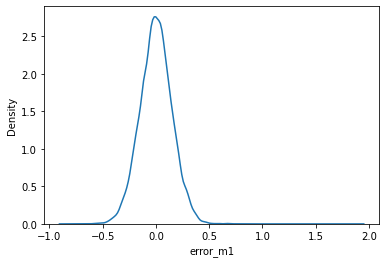

In [58]:
sns.kdeplot(data=tb_diamond_train, x="error_m1")


Vamos construir uma variável categórica classificando o erro observado no modelo I:

In [59]:
std_erro = tb_diamond_train["error_m1"].std()
tb_diamond_train["grp_erro"] = np.where(
    np.abs(tb_diamond_train["error_m1"]) > (2 * std_erro), "Outlier", "Normal"
)


In [60]:
tb_diamond_train["grp_erro"].value_counts()


Normal     45691
Outlier     2251
Name: grp_erro, dtype: int64

Vamos começar analisando se esses 2251 ofensores em relação às nossas variáveis continuas:

<AxesSubplot:xlabel='grp_erro', ylabel='table'>

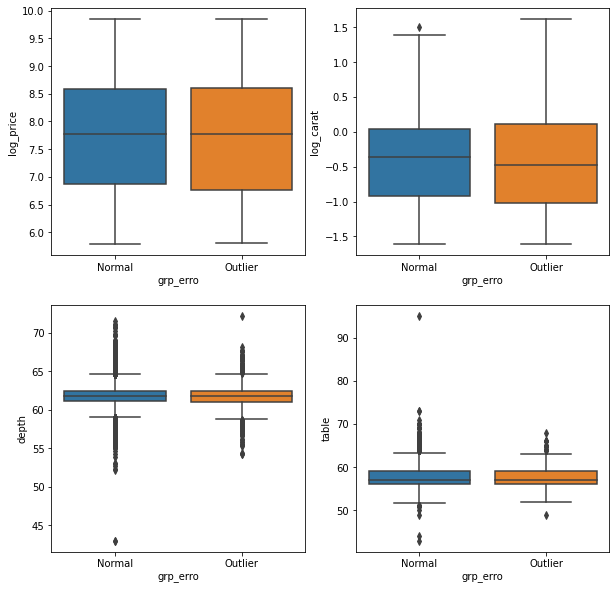

In [61]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.boxplot(data=tb_diamond_train, y="log_price", x="grp_erro", ax=ax[0][0])
sns.boxplot(data=tb_diamond_train, y="log_carat", x="grp_erro", ax=ax[0][1])
sns.boxplot(data=tb_diamond_train, y="depth", x="grp_erro", ax=ax[1][0])
sns.boxplot(data=tb_diamond_train, y="table", x="grp_erro", ax=ax[1][1])


In [62]:
pd.crosstab(
    tb_diamond_train["color"], tb_diamond_train["grp_erro"], normalize="columns"
)


grp_erro,Normal,Outlier
color,,
D,0.120264,0.245669
E,0.181130,0.179476
F,0.179138,0.122168
G,0.210326,0.219902
H,0.155545,0.113727
I,0.100370,0.095069
J,0.053227,0.023989


In [63]:
pd.crosstab(tb_diamond_train["cut"], tb_diamond_train["grp_erro"], normalize="columns")


grp_erro,Normal,Outlier
cut,,
Fair,0.023943,0.039538
Good,0.089974,0.073745
Ideal,0.403975,0.423812
Premium,0.255521,0.302088
Very Good,0.226587,0.160817


In [64]:
pd.crosstab(
    tb_diamond_train["clarity"], tb_diamond_train["grp_erro"], normalize="columns"
)


grp_erro,Normal,Outlier
clarity,,
I1,0.011534,0.030209
IF,0.031735,0.045757
SI1,0.245672,0.167481
SI2,0.162833,0.292315
VS1,0.156836,0.073301
VS2,0.231293,0.172368
VVS1,0.065899,0.107952
VVS2,0.094198,0.110618


In [65]:
tb_diamond_train["grade"] = (
    tb_diamond_train["clarity"] + tb_diamond_train["color"] + tb_diamond_train["cut"]
)


In [66]:
tb_diamond_train["grade"].value_counts()

VS2EIdeal    1007
VS1GIdeal     862
VS2DIdeal     834
VS2GIdeal     824
VS2FIdeal     792
             ... 
VVS1IFair       1
VVS1HFair       1
VVS1JGood       1
VVS1JFair       1
IFGFair         1
Name: grade, Length: 275, dtype: int64

In [68]:
ct_grade_norm = pd.crosstab(
    tb_diamond_train["grade"], tb_diamond_train["grp_erro"], normalize="columns"
).reset_index()
ct_grade_norm

grp_erro,grade,Normal,Outlier
0,I1DFair,0.000088,0.000000
1,I1DGood,0.000131,0.000444
2,I1DIdeal,0.000219,0.000888
3,I1DPremium,0.000219,0.000444
4,I1DVery Good,0.000109,0.000000
...,...,...,...
270,VVS2JFair,0.000000,0.000444
271,VVS2JGood,0.000197,0.000444
272,VVS2JIdeal,0.000963,0.002665
273,VVS2JPremium,0.000613,0.000444


<AxesSubplot:xlabel='diff', ylabel='Count'>

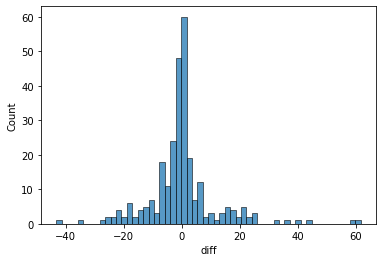

In [69]:
ct_grade_norm = pd.crosstab(
    tb_diamond_train["grade"], tb_diamond_train["grp_erro"], normalize="columns"
).reset_index()
ct_grade_norm["diff"] = (ct_grade_norm["Outlier"] - ct_grade_norm["Normal"]) * 2251
sns.histplot(data=ct_grade_norm, x="diff")


Vamos utilizar a lista dos `grades` com maior erro para criar variáveis dummies específicas:

In [70]:
lista_var_grade = list(ct_grade_norm.loc[ct_grade_norm["diff"] > 20, "grade"])


In [71]:
lista_var_grade

['IFDIdeal',
 'SI1DPremium',
 'SI1HIdeal',
 'SI2FIdeal',
 'SI2FPremium',
 'SI2GGood',
 'SI2GIdeal',
 'SI2GPremium',
 'SI2GVery Good',
 'VS2DIdeal',
 'VS2DPremium',
 'VS2GIdeal',
 'VS2IIdeal',
 'VVS1DIdeal',
 'VVS1EIdeal',
 'VVS2DIdeal']

In [72]:
for dummy in lista_var_grade:
    tb_diamond_train[dummy] = np.where(tb_diamond_train["grade"] == dummy, 1, 0)


In [73]:
tb_diamond_train

,carat,cut,color,clarity,depth,table,price,x,y,z,...,SI2GIdeal,SI2GPremium,SI2GVery Good,VS2DIdeal,VS2DPremium,VS2GIdeal,VS2IIdeal,VVS1DIdeal,VVS1EIdeal,VVS2DIdeal
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,...,0,0,0,0,0,0,0,0,0,0
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,...,0,0,0,0,0,0,0,0,0,0
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,...,0,0,0,0,0,0,0,0,0,0
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,...,0,0,0,0,0,0,0,0,0,0
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,...,0,0,0,0,0,0,0,0,0,0
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,...,0,0,0,0,0,0,0,0,0,0
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,...,0,0,0,0,0,0,0,0,0,0
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,...,0,0,0,0,0,0,0,0,0,0


# Modelo II

In [74]:
def transform_X_data_2(diamond_data, grade_dummy):
    diamond_data["grp_clarity"] = diamond_data["clarity"].map(
        lambda x: re.sub(r"[0-9]", "", x)
    )
    dict_color_group = {
        "D": "Colorless",
        "E": "Colorless",
        "F": "Colorless",
        "G": "Colorless",
        "H": "Near Colorless",
        "I": "Near Colorless",
        "J": "Tinted",
    }
    diamond_data["grp_color"] = diamond_data["color"].map(dict_color_group)
    dict_cut = {
        "Fair": "Fair",
        "Good": "Good",
        "Very Good": "Very Good/Premium",
        "Premium": "Very Good/Premium",
        "Ideal": "Ideal",
    }
    diamond_data["grp_cut"] = diamond_data["cut"].map(dict_cut)
    diamond_data["log_carat"] = np.log(diamond_data["carat"])
    diamond_data["log_carat_menor_2"] = np.where(
        diamond_data["carat"] < 2, diamond_data["log_carat"], 0
    )
    diamond_data["log_carat_maior_2"] = np.where(
        diamond_data["carat"] >= 2, diamond_data["log_carat"], 0
    )
    diamond_data["dist_carat"] = diamond_data["carat"] - (
        np.floor(diamond_data["carat"]) + 1
    )
    clarity_dummies = pd.get_dummies(diamond_data["grp_clarity"], prefix="grp_cla")
    color_dummies = pd.get_dummies(diamond_data["grp_color"], prefix="grp_col")
    cut_dummies = pd.get_dummies(diamond_data["grp_cut"], prefix="grp_cut")
    diamond_data["grade"] = (
        diamond_data["clarity"] + diamond_data["color"] + diamond_data["cut"]
    )
    for dummy in grade_dummy:
        diamond_data[dummy] = np.where(diamond_data["grade"] == dummy, 1, 0)
    diamond_data["color_D"] = np.where(diamond_data["color"] == "D", 1, 0)
    diamond_data["clarity_SI2"] = np.where(diamond_data["clarity"] == "SI2", 1, 0)
    return pd.concat(
        [diamond_data, clarity_dummies, color_dummies, cut_dummies], axis=1
    )


In [75]:
diamonds = pd.read_csv("tb_diamantes.csv")
print("Linhas na lidas:", str(len(diamonds)))
x_0 = diamonds["x"] == 0
y_0 = diamonds["y"] == 0
z_0 = diamonds["z"] == 0
dim_0 = x_0 | y_0 | z_0
tb_d_clean = diamonds[~dim_0].copy()

tb_d_clean["volume"] = tb_d_clean["x"] * tb_d_clean["y"] * tb_d_clean["z"]
tb_d_clean["density"] = tb_d_clean["carat"] / tb_d_clean["volume"]
density_inf = np.quantile(tb_d_clean["density"], 0.01)
density_sup = np.quantile(tb_d_clean["density"], 0.99)
density_in = (density_inf < tb_d_clean["density"]) & (
    tb_d_clean["density"] < density_sup
)
tb_d_clean = tb_d_clean[density_in].copy()
print("Linhas ao final do processo de limpeza:", str(len(tb_d_clean)))

diamonds_test = pd.read_csv("tb_diamantes_teste.csv")


Linhas na lidas: 48940
Linhas ao final do processo de limpeza: 47942


In [76]:
tb_diamond_train = transform_X_data_2(tb_d_clean, lista_var_grade)
tb_diamond_train["log_price"] = np.log(tb_diamond_train["price"])
tb_diamond_test = transform_X_data_2(diamonds_test, lista_var_grade)

x_var = [
    "log_carat",
    "log_carat_maior_2",
    "dist_carat",
    "grp_cla_I",
    "grp_cla_IF",
    "grp_cla_SI",
    "grp_cla_VS",
    "grp_col_Colorless",
    "grp_col_Tinted",
    "grp_cut_Fair",
    "grp_cut_Good",
    "grp_cut_Ideal",
    "color_D",
    "clarity_SI2",
]

X_train = tb_diamond_train[x_var + lista_var_grade]
X_test = tb_diamond_test[x_var + lista_var_grade]

y_train = tb_diamond_train["price"]
log_price_fit = LinearRegression()
log_price_fit.fit(X_train, np.log(y_train))
train_predict = np.exp(log_price_fit.predict(X_train))
print(np.sqrt(mean_squared_error(y_train, train_predict)))
tb_diamond_test["price_predicted"] = np.exp(log_price_fit.predict(X_test))
tb_diamond_test.to_csv("price_predicted.csv")


766.3977545784235


Melhoramos consideravelmente nosso modelo - temos um RMSE de $766 agora (no conjunto de teste)!

Este processo que estamos utilizando é semelhante ao algoritmo CART, utilizado na construção de árvores de decisão. Vamos *andar* um pouco pra frente no curso e utilizar uma árvore de decisão e comparar os resultados com nossa regressão!

In [77]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


In [78]:
params = {
    "max_depth": [int(x) for x in np.linspace(10, 300, 10)],
    "min_samples_leaf": [int(x) for x in np.linspace(2, 500, 10)],
    "min_samples_split": [int(x) for x in np.linspace(2, 500, 10)],
}


In [79]:
dt_price_fit = DecisionTreeRegressor()
cv_fit = GridSearchCV(dt_price_fit, params, n_jobs=-1)
cv_fit.fit(X_train, np.log(y_train))

tb_diamond_test["price_predicted"] = np.exp(cv_fit.predict(X_test))
tb_diamond_test.to_csv("dt_price_predicted.csv")


KeyboardInterrupt: 

RMSE de $662! Ao longo das próximas semanas aprenderemos como podemos alavancar algoritmos de previsão não-lineares, como árvores de decisão, para melhorar a performance de nossos modelos preditivos!

In [ ]:
from catboost import CatBoostRegressor


In [ ]:
cat_fit = CatBoostRegressor(iterations=10000, max_depth=8)
cat_fit.fit(X_train, np.log(y_train))

tb_diamond_test["price_predicted"] = np.exp(cv_fit.predict(X_test))
tb_diamond_test.to_csv("cat_price_predicted.csv")


In [ ]:
tb_diamond_test["price_predicted"] = np.exp(cat_fit.predict(X_test))
tb_diamond_test.to_csv("cat_price_predicted.csv")
